# Explore here

In [67]:
# Your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split

In [8]:
#Load the Data
df_raw = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv',delimiter=';')

In [9]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [10]:
df_raw.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
28526,41,blue-collar,married,basic.6y,no,yes,yes,cellular,apr,tue,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
21992,35,technician,single,university.degree,no,no,yes,cellular,aug,wed,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
16010,31,blue-collar,married,professional.course,no,yes,no,cellular,jul,tue,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,no
17052,42,technician,married,professional.course,no,yes,no,cellular,jul,fri,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
20987,46,technician,married,high.school,unknown,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
5560,41,admin.,single,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4633,33,unemployed,married,basic.9y,no,yes,no,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.858,5191.0,no
25474,35,housemaid,single,basic.4y,unknown,unknown,unknown,cellular,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.120,5195.8,no
9080,32,housemaid,single,high.school,no,no,no,telephone,jun,thu,...,2,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,no
33665,31,blue-collar,married,basic.9y,unknown,yes,yes,cellular,may,wed,...,3,999,1,failure,-1.8,92.893,-46.2,1.281,5099.1,no


In [11]:
df_raw.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [12]:
df_raw.to_csv('../data/raw/df_raw.csv')

In [52]:
df_processed = df_raw.copy()

In [53]:
#Remove all the variables that does not apport to the analysis.
df_processed = df_processed.drop(['contact','month','day_of_week','poutcome','nr.employed','job','marital','education','default'],axis=1)

In [54]:
df_processed.sample(10)

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
21584,36,yes,yes,69,1,999,0,1.4,93.444,-36.1,4.963,no
32066,33,no,yes,328,2,999,1,-1.8,92.893,-46.2,1.313,no
37098,38,yes,no,82,2,999,0,-2.9,92.469,-33.6,0.914,no
38667,29,yes,no,199,1,9,1,-3.4,92.649,-30.1,0.719,no
6251,39,yes,no,0,4,999,0,1.1,93.994,-36.4,4.857,no
21601,30,yes,no,111,1,999,0,1.4,93.444,-36.1,4.963,no
14845,37,yes,no,684,1,999,0,1.4,93.918,-42.7,4.957,no
13129,53,no,no,815,1,999,0,1.4,93.918,-42.7,4.962,yes
40934,27,no,no,143,1,999,0,-1.1,94.601,-49.5,0.982,no
12269,27,no,no,100,3,999,0,1.4,93.918,-42.7,4.966,no


In [55]:
df_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045


In [56]:
df_processed['housing'].value_counts()

housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64

In [57]:
#Lets remove all the entries were the housing is unknown
df_processed = df_processed[df_processed['housing'] != "unknown"]

In [58]:
df_processed.sample(5)

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
24774,36,yes,yes,130,1,999,0,-0.1,93.200,-42.0,4.153,no
41110,34,yes,no,200,1,3,1,-1.1,94.767,-50.8,1.046,yes
40703,71,no,no,363,1,999,0,-1.1,94.199,-37.5,0.879,yes
4770,60,yes,no,202,6,999,0,1.1,93.994,-36.4,4.858,no
13132,40,yes,yes,323,1,999,0,1.4,93.918,-42.7,4.962,no


In [59]:
df_processed['housing'].value_counts()

housing
yes    21576
no     18622
Name: count, dtype: int64

In [60]:
df_processed['loan'].value_counts()

loan
no     33950
yes     6248
Name: count, dtype: int64

In [79]:
df_processed['y'].value_counts() #El dataset no es balanceado

y
0    35665
1     4533
Name: count, dtype: int64

In [62]:
#Convert 'Housing', 'Loan' and 'y' variables to Boolean

df_processed['housing'] = df_processed['housing'].apply(lambda x: 1 if x=='yes' else 0)
df_processed['loan'] = df_processed['loan'].apply(lambda x: 1 if x=='yes' else 0)
df_processed['y'] = df_processed['y'].apply(lambda x: 1 if x=='yes' else 0)

In [64]:
df_processed.sample(5)

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
19088,30,1,0,95,2,999,0,1.4,93.444,-36.1,4.968,0
38146,56,0,0,277,1,999,1,-3.4,92.379,-29.8,0.750,1
29538,42,0,1,144,1,999,0,-1.8,93.075,-47.1,1.405,0
19695,40,1,0,123,3,999,0,1.4,93.444,-36.1,4.968,0
33558,32,1,1,209,2,999,0,-1.8,92.893,-46.2,1.291,0


In [65]:
df_processed.describe().T

,count,mean,std,min,25%,50%,75%,max
age,40198.0,40.025847,10.422343,17.000,32.000,38.000,47.000,98.000
housing,40198.0,0.536743,0.498654,0.000,0.000,1.000,1.000,1.000
loan,40198.0,0.155431,0.362319,0.000,0.000,0.000,0.000,1.000
duration,40198.0,258.484253,259.387105,0.000,102.000,180.000,320.000,4918.000
campaign,40198.0,2.567765,2.765476,1.000,1.000,2.000,3.000,43.000
pdays,40198.0,962.415817,187.057645,0.000,999.000,999.000,999.000,999.000
previous,40198.0,0.172670,0.494075,0.000,0.000,0.000,0.000,7.000
emp.var.rate,40198.0,0.081109,1.570546,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,40198.0,93.574178,0.578194,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,40198.0,-40.507856,4.629656,-50.800,-42.700,-41.800,-36.400,-26.900


In [66]:
df_processed.corr()

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,y
age,1.000000,-0.001636,-0.007375,-0.000134,0.004619,-0.035213,0.025081,-0.000962,0.000714,0.129586,0.010230,0.030319
housing,-0.001636,1.000000,0.046462,-0.007806,-0.011168,-0.010649,0.021656,-0.060917,-0.081396,-0.034167,-0.059978,0.011662
loan,-0.007375,0.046462,1.000000,-0.000207,0.005353,0.000050,-0.001924,0.001422,-0.004934,-0.013379,-0.000300,-0.004682
duration,-0.000134,-0.007806,-0.000207,1.000000,-0.071448,-0.047567,0.019363,-0.026801,0.006366,-0.008635,-0.031273,0.405043
campaign,0.004619,-0.011168,0.005353,-0.071448,1.000000,0.052443,-0.079599,0.151611,0.128957,-0.014300,0.135940,-0.065743
pdays,-0.035213,-0.010649,0.000050,-0.047567,0.052443,1.000000,-0.587100,0.271526,0.079908,-0.092259,0.296987,-0.323600
previous,0.025081,0.021656,-0.001924,0.019363,-0.079599,-0.587100,1.000000,-0.420353,-0.204167,-0.050569,-0.453702,0.228633
emp.var.rate,-0.000962,-0.060917,0.001422,-0.026801,0.151611,0.271526,-0.420353,1.000000,0.775032,0.196934,0.972249,-0.297407
cons.price.idx,0.000714,-0.081396,-0.004934,0.006366,0.128957,0.079908,-0.204167,0.775032,1.000000,0.059504,0.687881,-0.135705
cons.conf.idx,0.129586,-0.034167,-0.013379,-0.008635,-0.014300,-0.092259,-0.050569,0.196934,0.059504,1.000000,0.278466,0.055327


In [68]:
df_final = df_processed.copy()

df_processed.to_csv("../data/processed/processed.csv")

In [70]:
X = df_final.drop(['y'],axis=1)
y = df_final['y']
X

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
0,56,0,0,261,1,999,0,1.1,93.994,-36.4,4.857
1,57,0,0,149,1,999,0,1.1,93.994,-36.4,4.857
2,37,1,0,226,1,999,0,1.1,93.994,-36.4,4.857
3,40,0,0,151,1,999,0,1.1,93.994,-36.4,4.857
4,56,0,1,307,1,999,0,1.1,93.994,-36.4,4.857
...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,0,334,1,999,0,-1.1,94.767,-50.8,1.028
41184,46,0,0,383,1,999,0,-1.1,94.767,-50.8,1.028
41185,56,1,0,189,2,999,0,-1.1,94.767,-50.8,1.028
41186,44,0,0,442,1,999,0,-1.1,94.767,-50.8,1.028


In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2315, test_size=0.2)

In [78]:
X_train.sample(10)

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m
16704,47,1,0,1359,6,999,0,1.4,93.918,-42.7,4.963
21847,29,1,1,467,1,999,0,1.4,93.444,-36.1,4.964
30180,41,0,0,281,1,999,0,-1.8,93.075,-47.1,1.365
32467,28,1,0,237,4,999,0,-1.8,92.893,-46.2,1.313
4160,36,0,0,187,3,999,0,1.1,93.994,-36.4,4.858
38065,83,1,0,75,2,999,0,-3.4,92.379,-29.8,0.771
39046,56,1,0,280,3,6,1,-3.0,92.713,-33.0,0.715
22622,60,1,0,527,4,999,0,1.4,93.444,-36.1,4.964
31543,31,1,0,633,1,999,0,-1.8,92.893,-46.2,1.327
37648,33,0,1,113,1,6,2,-2.9,92.201,-31.4,0.859


In [77]:
y_train.sample(10)

40670    1
11610    0
13639    0
12412    0
13042    0
35443    0
40993    1
40137    1
24945    0
15483    0
Name: y, dtype: int64

In [81]:
model = LogisticRegression(random_state=2315)# Con class_weight='balanced' le indico que el data set esta desbalanceado por clase.
model.fit(X_train, y_train)

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=2315)

In [82]:
y_hat = model.predict(X_test)
y_hat

array([0, 0, 0, ..., 0, 0, 0])

In [96]:
model_accuracy = accuracy_score(y_test, y_hat)
model_accuracy

0.9103233830845772

In [ ]:
#The accuracy_score obtained is 0.91, which gives a prediction for the model.

In [84]:
cm = confusion_matrix(y_test, y_hat) #CM = Confusion Matriz

cm_df = pd.DataFrame(cm)

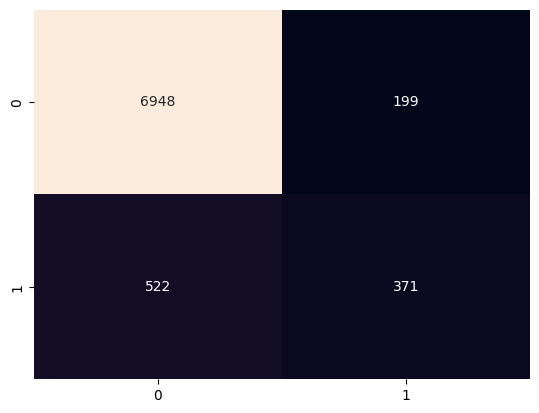

In [85]:
sns.heatmap(cm_df, annot=True, fmt='d', cbar=False)
plt.show()

In [87]:
#Lets adjust the model with some Hyperparameters
from sklearn.model_selection import GridSearchCV

In [88]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "penalty": ["l1", "l2", "elasticnet", None],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

In [89]:
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=2315),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy')

In [90]:
grid.fit(X_train, y_train)
print(f"Best hyperparameters: {grid.best_params_}")

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warning

Best hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}


/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [91]:
model_grid = LogisticRegression(penalty='l2', C=10, solver='newton-cg')
model_grid.fit(X_train, y_train)

/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/home/arnaldoch/Documents/Bootcamp_Data_Science/Tareas/logistic-regression-project/.env/lib/python3.10/site-packages/sklearn/utils/optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


LogisticRegression(C=10, solver='newton-cg')

In [92]:
y_hat_model_grid = model_grid.predict(X_test)

In [103]:
grid_accuracy = accuracy_score(y_test,y_hat_model_grid)
print('Accuracy of the model on test set: {:.4f}'.format(grid_accuracy))

Accuracy of the model on test set: 0.9127


In [105]:
print(f'The Model accuracy was incremented on {((grid_accuracy-model_accuracy)/model_accuracy)*100:.2f}%')

The Model accuracy was incremented on 0.26%
